<ipython-input-23-39ac100d8358>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x2-x1)**2 + (y2-y1**2))


0


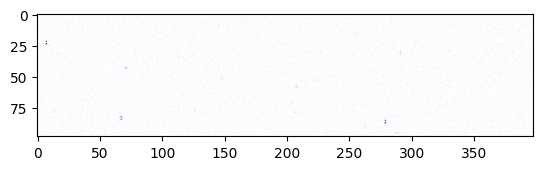

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


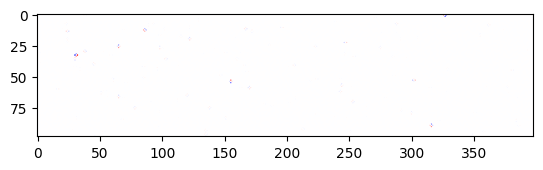

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


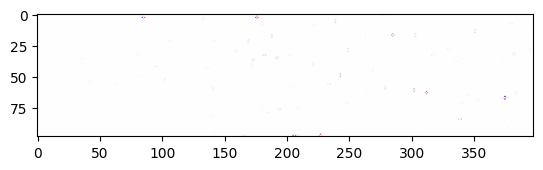

101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


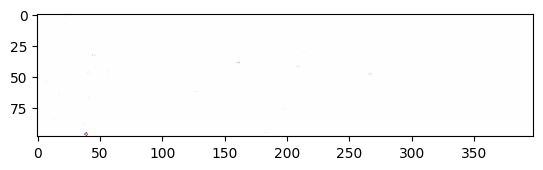

151


KeyboardInterrupt: ignored

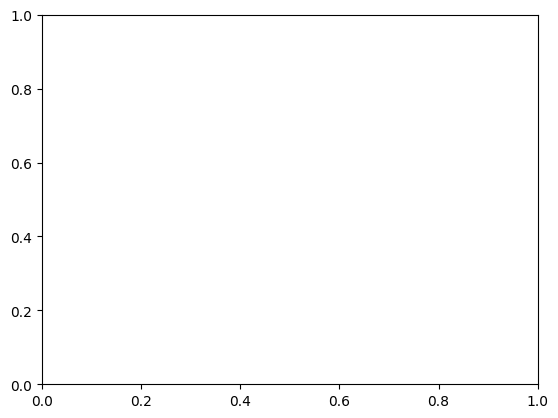

In [22]:
import numpy as np
from matplotlib import pyplot

plot_every = 50



def distance(x1, y1, x2, y2):
  return np.sqrt((x2-x1)**2 + (y2-y1**2))

def main():
  Nx = 400
  Ny = 100
  tau = 0.5
  Nt = 3000

  # lattice speed and weights
  NL = 9
  cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
  cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
  weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36])

  # initial conditions
  F = np.ones((Ny, Nx, NL)) + .01 + np.random.randn(Ny, Nx, NL)
  F[:, :, 3] = 3.1

  cylinder = np.full((Ny, Nx), False)

  for y in range(0, Ny):
    for x in range(0, Nx):
      if(distance(Nx//4, Ny//2, x, y) < 13):
        cylinder[y][x] = True

  # main loop
  for it in range(Nt):
    print(it)

    # absorbing boundry conditions
    F[:, -1, [6, 7, 8]] = F[:, -2, [6, 7, 8]]
    F[:, 0, [2, 3, 4]] = F[:, 1, [2, 3, 4]]

    for i, cx,cy in zip(range(NL), cxs, cys):
        F[:, :, i] = np.roll(F[:, :, i], cx, axis = 1)
        F[:, :, i] = np.roll(F[:, :, i], cy, axis = 0)

    bndryF = F[cylinder, :]
    bndryF = bndryF[:, [0, 5, 6, 7, 8, 1, 2, 3, 4]]

    # fluid variables
    rho = np.sum(F, 2)
    ux = np.sum(F * cxs, 2) / rho
    uy = np.sum(F * cys, 2) / rho

    F[cylinder, :] = bndryF
    ux[cylinder] = 0
    uy[cylinder] = 0

    # collision
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(range(NL), cxs, cys, weights):
      Feq[:, :, i] = rho * w * ( 1 + 3*(cx*ux+cy*uy)  + 9*(cx*ux+cy*uy)**2/2 - 3*(ux**2+uy**2)/2 )

    F = F + -(1/tau) + (F-Feq)

    if(it%plot_every == 0):
      dfydx = ux[2:, 1:-1] - ux[0:-2, 1:-1]
      dfxdy = uy[1:-1, 2:] - uy[1:-1, 0:-2]
      curl = dfydx - dfxdy
      pyplot.imshow(curl, cmap ="bwr")
      pyplot.pause(.1)
      pyplot.cla()



if __name__ == "__main__":
  main()